In [39]:
import sys
import os
sys.path.append(os.path.join(os.getcwd()))

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from utils.conn_data import load_pickle

plt.style.use('ggplot')

In [11]:
data = load_pickle(os.path.join(os.getcwd(), "data", "outputs", "all_model_predictions.pickle"))

In [45]:
metrics = []
mse_diff = []
for ref in data.keys():
    if "lasso" not in ref:
        ticker = ref.split("_")[0]
        model = ref.split("_")[1]
        bt = ref.split("_")[-1]

        pred = data[ref]["predictions"]["prediction"]
        lasso_pred = data[f"{ticker}_lasso"]["predictions"]["prediction"]
        true = data[ref]["predictions"]["true"]

        # var-lingam
        rolling_var = pred.rolling(12).var()
        rolling_bias = (true - pred).pow(2).rolling(12).mean()
        rolling_mse = rolling_var + rolling_bias

        # lasso
        lasso_rolling_var = lasso_pred.rolling(12).var()
        lasso_rolling_bias = (true - lasso_pred).pow(2).rolling(12).mean()
        lasso_rolling_mse = lasso_rolling_var + lasso_rolling_bias

        # diff
        rolling_mse_diff = lasso_rolling_mse - rolling_mse
        rolling_mse_diff_df = pd.DataFrame(rolling_mse_diff, columns=[f"{model} bt={bt}"])
        mse_diff.append(rolling_mse_diff_df)

        # mse
        mse = mean_squared_error(true, pred)
        mse_df = pd.DataFrame([{"mse": mse, "bt": bt, "ticker": ticker, "model": model}])
        metrics.append(mse_df)

lasso_mse = mean_squared_error(true, lasso_pred)
lasso_mse_df = pd.DataFrame([{"mse": lasso_mse, "bt": np.nan, "ticker": ticker, "model": "lasso"}])
metrics.append(lasso_mse_df)

metrics_df = pd.concat(metrics)
mse_diff_df = pd.concat(mse_diff, axis=1)


<AxesSubplot:xlabel='date'>

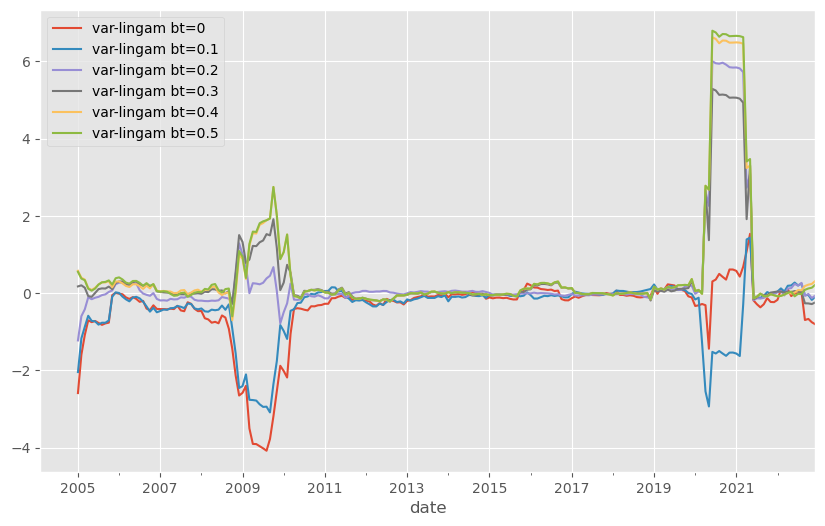

In [46]:
mse_diff_df.plot(figsize=(10, 6))

In [50]:
metrics_df.sort_values(by="mse", ascending=True)

,mse,bt,ticker,model
0,1.037084,0.4,SPY,var-lingam
0,1.038721,0.5,SPY,var-lingam
0,1.113759,0.3,SPY,var-lingam
0,1.138311,0.2,SPY,var-lingam
0,1.244962,NaN,SPY,lasso
0,1.446999,0.1,SPY,var-lingam
0,1.507901,0,SPY,var-lingam
